## Linki

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

## Opis cech (features)

### Lista występujących cech w danych:

##### 1. class  _klasa_:
- edible = e    > _jadalne_
- poisonous = p > _trujące_

##### 2. cap-shape  _kształt kapelusza_:
- bell = b      > _dzwon_
- conical = c   > _stożkowy_
- convex = x    > _wypukły_
- flat = f      > _płaski_
- knobbed = k   > _gałkowy_
- sunken = s    > _wklęsły_

##### 3. cap-surface  _powierzchnia kapelusza_:
- fibrous = f   > _włóknista_
- grooves = g   > _rowkowata_
- scaly = y     > _łuskowata_
- smooth = s    > _gładka_

##### 3. cap-color _kolor kapelusza_:
- brown = n     > _brązowy_
- buff = b      > _jasnobrązowożółty_
- cinnamon = c  > _cynamon_
- gray = g      > _szary_
- green = r     > _zielony_
- pink = p      > _różowy_
- purple = u    > _fioletowy_
- red = e       > _czerwony_
- white = w     > _biały_
- yellow = y    > _zółty_

##### 4. bruises _bruzdy_:
- bruises = t   > _prawda_
- no = f        > _fałsz_

##### 5. odor _zapach_:
- almond=a > _migdałowy_
- anise=l >_anyżowy_
- creoote=c >_kreotyzowy_
- fishy=y >_rybi_
- foul=f >_śmierdzący_
- musty=m >_stęchły_
- none=n 
- pungent=p >_cierpki_
- spicy=s > _pikantny_

##### 6. gill-attachment _blaszki:
- attached=a
- descending=d
- free=f
- notched=n

##### 7. gill-spacing _odstępy blaszek_:
- close=c
- crowded=w
- distant=d

##### 8. gill-size _rozmiar blaszek_:
- broad=b
- narrow=n

##### 9. gill-color _kolor blaszek_:
- black=k
- brown=n
- buff=b
- chocolate=h
- gray=g
- green=r
- orange=o
- pink=p
- purple=u
- red=e
- white=w
- yellow=y

##### 10. stalk-shape _trzon_:
- enlarging=e
- tapering=t

##### 11. stalk-root _korzeń trzonu_:
- bulbous=b
- club=c
- cup=u
- equal=e
- rhizomorphs=z
- rooted=r
- missing=?

##### 12. stalk-surface-above-ring _powierzchnia trzonu powyżej pierścienia_:
- fibrous=f > _włóknista_
- scaly=y > _łuskowata_
- silky=k > _jedwabista_
- smooth=s > _gładka_

##### 13. stalk-surface-below-ring _powierzchnia trzonu poniżej pierścienia_:
- fibrous=f
- scaly=y
- silky=k
- smooth=s

##### 14. stalk-color-above-ring _kolor trzonu powyżej pierścienia_:
- brown=n
- buff=b
- cinnamon=c
- gray=g
- orange=o
- pink=p
- red=e
- white=w
- yellow=y

##### 15. stalk-color-below-ring _kolor trzonu poniżej pierścienia_:
- brown=n
- buff=b
- cinnamon=c
- gray=g
- orange=o
- pink=p
- red=e
- white=w
- yellow=y

##### 16. veil-type _typ welonu_:
- parial=p
- universal=u

##### 17. veil-color _kolor welonu_:
- brown=n,
- orange=o
- white=w
- yellow=y

##### 18. ring-number _ilość pierścieni_:
- none=none=o,two=t

##### 19. ring-type _rodzaj pierścienia_:
- cobwebby=c
- evanescent=e
- flaring=f
- large=l
- none=n
- pendant=p
- sheathing=s
- zone=z

##### 20. spore-print-color _kolor zarodników_:
- black=k
- brown=n
- buff=b
- chocolate=h
- green=r
- orange=o
- purple=u
- white=w
- yellow=y

##### 21. population _populacja_:
- abundant=a
- clustered=c
- numerous=n
- scattered=s
- several=v
- solitary=y

##### 22. habitat _środowisko występowania_:
- grasses=g
- leaves=l
- meadows=m
- paths=p
- urban=u
- waste=w
- woods=d

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from mlxtend import plotting
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
df = pd.read_csv('mushrooms.csv')
df_columns = pd.read_csv('mushrooms.csv')

In [3]:
# domyślnie podaje 5 wierszy
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# object Dtype = string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
# Liczebność grzybór jadalnych (e) i trujących (p):
jadalne = df["class"].value_counts()["e"]
trujace = df["class"].value_counts()["p"]
print(f"Liczba grzybów jadalnych: {jadalne}, trujących: {trujace}.")

Liczba grzybów jadalnych: 4208, trujących: 3916.


In [7]:
#sprawdzenie duplikatów
df.duplicated().any()

False

In [8]:
# Sprawdzenie brakujących wartości
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
# Sprawdzenie wartości NaN
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [10]:
#zamiana danych na OHE, wywalamy class p - to będzie nasz target (class_e)
df = pd.get_dummies(df)
df = df.drop(["class_p"], axis=1)

In [11]:
y = df.class_e
x = df.drop(["class_e"], axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
rf_classifier = RandomForestClassifier(n_estimators = 5, criterion = 'gini', max_depth=5, bootstrap=True, random_state=1)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=1)

In [14]:
rf_classifier.score(X_test, y_test)

0.992

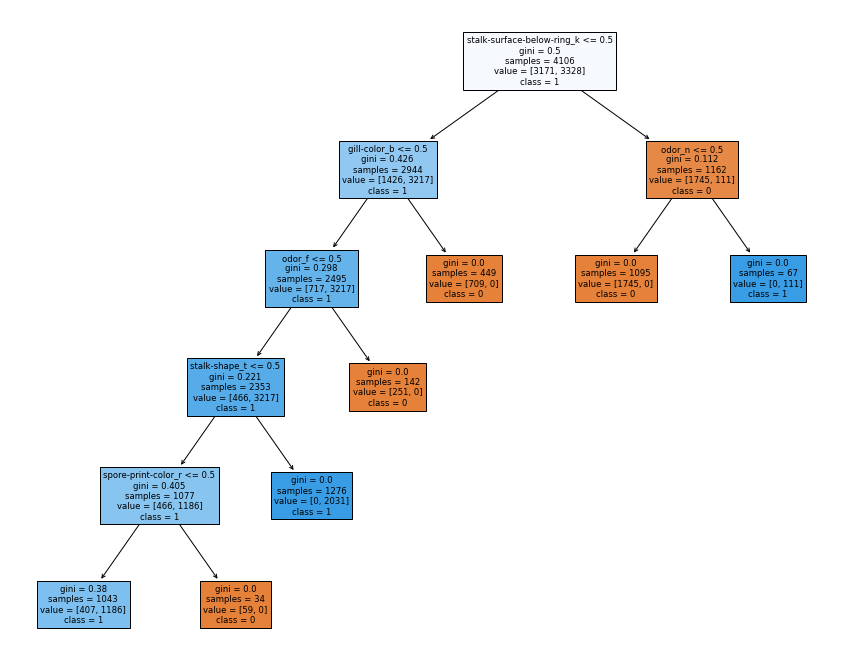

In [15]:
plt.figure(figsize = (15,12))

plot_tree(rf_classifier.estimators_[0],
        feature_names=x.columns,
        class_names=["0","1"],
        filled=True);

In [16]:
feature_importances = pd.DataFrame(rf_classifier.feature_importances_, index=x.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)



In [17]:
most_important_features = feature_importances[feature_importances["importance"] > 0]
len(most_important_features)

34

In [18]:
feature_importances[feature_importances["importance"] > 0]

,importance
odor_n,0.188955
stalk-surface-below-ring_k,0.168831
bruises_f,0.101473
gill-color_b,0.097364
odor_f,0.093649
habitat_g,0.056987
stalk-surface-below-ring_s,0.045239
ring-type_l,0.022992
odor_p,0.022717
cap-color_y,0.021617


In [19]:
most_important_features[most_important_features["importance"] > 0.05]

,importance
odor_n,0.188955
stalk-surface-below-ring_k,0.168831
bruises_f,0.101473
gill-color_b,0.097364
odor_f,0.093649
habitat_g,0.056987


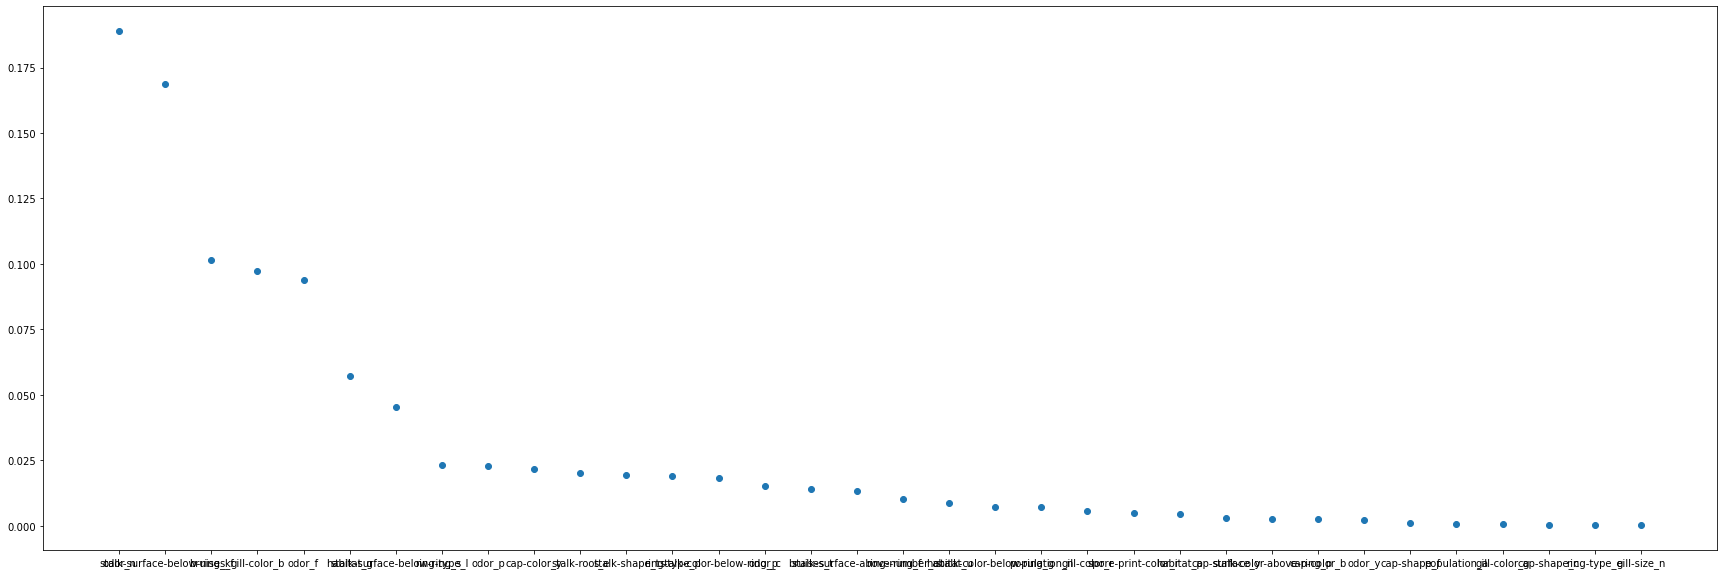

In [20]:
plt.figure(figsize=(30,10))
plt.plot(most_important_features, "o" )

In [21]:
z = df_columns.columns
x_columns = pd.DataFrame(x) 
proba = x_columns.columns
z[1] in proba[0]


True

In [22]:
feature_importances

,importance
odor_n,0.188955
stalk-surface-below-ring_k,0.168831
bruises_f,0.101473
gill-color_b,0.097364
odor_f,0.093649
...,...
gill-color_o,0.000000
gill-color_n,0.000000
gill-color_k,0.000000
gill-color_h,0.000000


In [77]:
fi = pd.DataFrame(feature_importances).reset_index()
fi.columns = ["feature", "importance"]

In [78]:
odor = fi[fi["feature"].str.contains("odor")]
print(odor)

   feature  importance
0   odor_n    0.188955
4   odor_f    0.093649
8   odor_p    0.022717
14  odor_c    0.015243
27  odor_y    0.002231
74  odor_s    0.000000
75  odor_m    0.000000
76  odor_l    0.000000
77  odor_a    0.000000


In [25]:
slownik = {}
for f in z:
    odor = fi[fi["feature"].str.contains(f)].importance.sum()
    print(f, odor)

class 0.0
cap-shape 0.0015221216327067038
cap-surface 0.0030046864266990193
cap-color 0.024113392608577006
bruises 0.11555872703307278
odor 0.32279505876564984
gill-attachment 0.0
gill-spacing 0.0
gill-size 0.000173784229008448
gill-color 0.10359652650409903
stalk-shape 0.019502124491156663
stalk-root 0.019997719817386874
stalk-surface-above-ring 0.013342589466277232
stalk-surface-below-ring 0.21406979087764896
stalk-color-above-ring 0.002633919971983077
stalk-color-below-ring 0.02517542366890133
veil-type 0.0
veil-color 0.0
ring-number 0.010228628672223385
ring-type 0.042058598578415665
spore-print-color 0.004775211994629459
population 0.007455089148871934
habitat 0.06999660611269268


In [26]:
for row in fi.itertuples():
    print(row.feature, row.importance)

odor_n 0.1889549097022132
stalk-surface-below-ring_k 0.16883124416329165
bruises_f 0.10147284018548629
gill-color_b 0.09736420311343898
odor_f 0.09364913047078609
habitat_g 0.05698670768194318
stalk-surface-below-ring_s 0.04523854671435731
ring-type_l 0.022992049328559555
odor_p 0.022716896412037967
cap-color_y 0.02161656432904271
stalk-root_e 0.019997719817386874
stalk-shape_t 0.019502124491156663
ring-type_p 0.018810040491449957
stalk-color-below-ring_p 0.01801250291317341
odor_c 0.01524341876796307
bruises_t 0.014085886847586498
stalk-surface-above-ring_f 0.013342589466277232
ring-number_o 0.010228628672223385
habitat_u 0.008644329719812395
stalk-color-below-ring_g 0.007162920755727917
population_n 0.00694171817185504
gill-color_r 0.005725010730688486
spore-print-color_r 0.004775211994629459
habitat_p 0.004365568710937102
cap-surface_y 0.0030046864266990193
stalk-color-above-ring_p 0.002633919971983077
cap-color_b 0.002496828279534295
odor_y 0.0022307034126495284
cap-shape_f 0.00110

In [27]:
#tworzenie widgetów

In [28]:
import ipywidgets as widgets
from IPython.display import display

In [29]:
widgets_cap_shape = widgets.Dropdown(options=["bell", "conical", "convex", "flat", "knobbed", "sunken"])
widgets_cap_surface = widgets.Dropdown(options=["fibrous", "grooves", "scaly", "smooth"])
widgets_cap_color = widgets.Dropdown(options=["brown", "buff", "cinnamon", "gray", "green", "pink", "purple", "red", "white", "yellow"])
widget_bruises = widgets.Dropdown(options=["Yes", "No"])

In [30]:
values = {"Cap Shape": widgets_cap_shape.value, "Cap Surface": widgets_cap_surface.value, "Cap Color": widgets_cap_color.value, "Bruises": widget_bruises.value}

def widget_handler(Cap_Shape, Cap_Surface, Cap_Color, Bruises):
    values["Cap Shape"] = Cap_Shape
    values["Cap Surface"] = Cap_Surface
    values["Cap Color"] = Cap_Color
    values["Bruises"] = Bruises

widgets.interact(widget_handler, Cap_Shape = widgets_cap_shape, Cap_Surface = widgets_cap_surface, Cap_Color = widgets_cap_color, Bruises = widget_bruises)

interactive(children=(Dropdown(description='Cap_Shape', options=('bell', 'conical', 'convex', 'flat', 'knobbed…

<function __main__.widget_handler(Cap_Shape, Cap_Surface, Cap_Color, Bruises)>

In [31]:
print(values)

{'Cap Shape': 'bell', 'Cap Surface': 'fibrous', 'Cap Color': 'brown', 'Bruises': 'Yes'}


In [67]:
values["Cap Shape"]

'bell'

In [32]:
run_button = widgets.Button(description = "Run")

def button_callback(button):
    print(values)

run_button.on_click(button_callback)

In [33]:
display(widgets_cap_shape, widgets_cap_surface, widgets_cap_color, widget_bruises, run_button)

Dropdown(description='Cap_Shape', options=('bell', 'conical', 'convex', 'flat', 'knobbed', 'sunken'), value='b…

Dropdown(description='Cap_Surface', options=('fibrous', 'grooves', 'scaly', 'smooth'), value='fibrous')

Dropdown(description='Cap_Color', options=('brown', 'buff', 'cinnamon', 'gray', 'green', 'pink', 'purple', 're…

Dropdown(description='Bruises', options=('Yes', 'No'), value='Yes')

Button(description='Run', style=ButtonStyle())

In [34]:
xgb_cl_1 = xgb.XGBClassifier( n_estimators=100,
                           max_depth=3,
                           use_label_encoder=False,
                           eval_metric='error'
                        )
xgb_cl_1.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

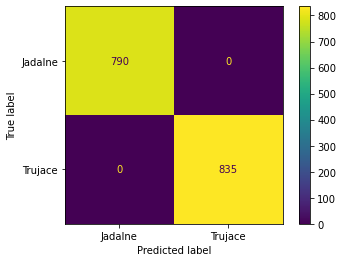

In [35]:
plot_confusion_matrix(xgb_cl_1,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Jadalne", "Trujace"])

In [36]:
xgb_cl_2 = xgb.XGBClassifier(n_estimators=100,
                             seed=42,
                             objective='binary:logistic',
                             use_label_encoder=False,
                             eval_metric='aucpr'
                             )
xgb_cl_2.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='aucpr', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

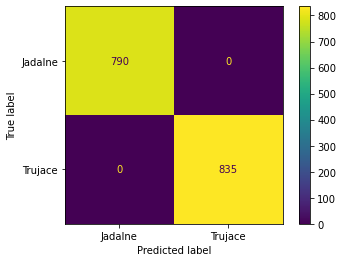

In [37]:
plot_confusion_matrix(xgb_cl_2,
                      X_test,
                      y_test,
                      values_format='d',
                      display_labels=["Jadalne", "Trujace"])

In [131]:
empty_df = pd.DataFrame(X_test.loc[0]).transpose()
empty_df.loc[0] = 0

In [133]:
empty_df

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [207]:
k = a.filter(regex="habitat")
k.columns

Index(['habitat_d', 'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w'],
      dtype='object')

In [129]:
k.loc[0, ["cap-shape_b", "cap-shape_f"]] = 1
k

C:\Users\Bartek\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Bartek\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,1,0,1,0,0,0


In [149]:
index_cap_shape = ["bell", "conical", "convex", "flat", "knobbed", "sunken"]
index_cap_surface = ["fibrous", "grooves", "scaly", "smooth"]
index_cap_color = ["brown", "buff", "cinnamon", "gray", "green", "pink", "purple", "red", "white", "yellow"]
index_bruises = ["Yes", "No"]
index_odor = ["almond", "anise", "creoote", "fishy", "foul", "musty", "none", "pungent", "spicy"]
index_gill_attachment = ["attached", "descending", "free", "notched"]
index_gill_spacing = ["close", "crowded", "distant"]
index_gill_size = ["broad", "narrow"]
index_gill_color = ["black", "brown", "buff", "chocolate", "gray", "green", "orange", "pink", "purple", "red", "white", "yellow"]
index_stalk_shape = ["enlarging", "tapering"]
index_stalk_root = ["bulbous", "club", "cup", "equal", "rhizomorphs", "rooted", "missing"]
index_stalk_surface_above_ring = ["fibrous", "scaly", "silky", "smooth"]
index_stalk_surface_below_ring = ["fibrous", "scaly", "silky", "smooth"]
index_stalk_color_above_ring = ["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"]
index_stalk_color_below_ring = ["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"]
index_veil_type = ["parial", "universal"]
index_veil_color = ["brown", "orange", "white", "yellow"]
index_ring_number = ["none", "two"]
index_ring_type = ["cobwebby", "evanescent", "flaring", "large", "none", "pendant", "sheathing", "zone"]
index_spore_print_color = ["black", "brown", "buff", "chocolate", "green", "orange", "purple", "white", "yellow"]
index_population = ["abundant", "clustered", "numerous", "scattered", "several", "solitary"]
index_habitat = ["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"]

In [150]:
index_cap_shape.index("conical")

1

In [204]:
def xd(chosen_values):
    list_of_chosen_values = list(chosen_values.values())

    index_cap_shape = ["bell", "conical", "convex", "flat", "knobbed", "sunken"]
    find_index_cap_shape = ['cap-shape_b', 'cap-shape_c', 'cap-shape_x', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s']

    index_cap_surface = ["fibrous", "grooves", "scaly", "smooth"]
    find_index_cap_surface = ['cap-surface_f', 'cap-surface_g', 'cap-surface_y', 'cap-surface_s']

    index_cap_color = ["brown", "buff", "cinnamon", "gray", "green", "pink", "purple", "red", "white", "yellow"]
    find_index_cap_color = ['cap-color_n', 'cap-color_b', 'cap-color_c', 'cap-color_g', 'cap-color_r', 'cap-color_p', 'cap-color_u', 'cap-color_e', 'cap-color_w', 'cap-color_y']

    index_bruises = ["Yes", "No"]
    find_index_bruises = ['bruises_t', 'bruises_f']

    index_odor = ["almond", "anise", "creoote", "fishy", "foul", "musty", "none", "pungent", "spicy"]
    find_index_odor = ['odor_a', 'odor_l', 'odor_c', 'odor_y', 'odor_f', 'odor_m', 'odor_n', 'odor_p', 'odor_s']

    index_gill_attachment = ["attached", "free"]
    find_index_gill_attachment = ['gill-attachment_a', 'gill-attachment_f']

    index_gill_spacing = ["close", "crowded"]
    find_index_gill_spacing = ['gill-spacing_c', 'gill-spacing_w']

    index_gill_size = ["broad", "narrow"]
    find_index_gill_size = ['gill-size_b', 'gill-size_n']

    index_gill_color = ["black", "brown", "buff", "chocolate", "gray", "green", "orange", "pink", "purple", "red", "white", "yellow"]
    find_index_gill_color = ['gill-color_k', 'gill-color_n', 'gill-color_b', 'gill-color_h', 'gill-color_g', 'gill-color_r', 'gill-color_o', 'gill-color_p', 'gill-color_u', 'gill-color_e', 'gill-color_w', 'gill-color_y']
    
    index_stalk_shape = ["enlarging", "tapering"]
    find_index_stalk_shape = ['stalk-shape_e', 'stalk-shape_t']

    index_stalk_root = ["bulbous", "club", "equal", "rooted", "missing"]
    find_index_stalk_root = ['stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r', 'stalk-root_?']
    
    index_stalk_surface_above_ring = ["fibrous", "scaly", "silky", "smooth"]
    find_index_stalk_surface_above_ring = ['stalk-surface-above-ring_f', 'stalk-surface-above-ring_y', 'stalk-surface-above-ring_k', 'stalk-surface-above-ring_s']
    
    index_stalk_surface_below_ring = ["fibrous", "scaly", "silky", "smooth"]
    find_index_stalk_surface_below_ring = ['stalk-surface-below-ring_f', 'stalk-surface-below-ring_y', 'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s']
    
    index_stalk_color_above_ring = ["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"]
    find_index_stalk_color_above_ring = ['stalk-color-above-ring_n', 'stalk-color-above-ring_b','stalk-color-above-ring_c', 'stalk-color-above-ring_g','stalk-color-above-ring_o', 'stalk-color-above-ring_p','stalk-color-above-ring_e', 'stalk-color-above-ring_w','stalk-color-above-ring_y']
    
    index_stalk_color_below_ring = ["brown", "buff", "cinnamon", "gray", "orange", "pink", "red", "white", "yellow"]
    find_index_stalk_color_below_ring = ['stalk-color-below-ring_n', 'stalk-color-below-ring_b','stalk-color-below-ring_c', 'stalk-color-below-ring_g','stalk-color-below-ring_o', 'stalk-color-below-ring_p','stalk-color-below-ring_e', 'stalk-color-below-ring_w','stalk-color-below-ring_y']
    
    index_veil_type = ["parial"]
    find_index_veil_type = ['veil-type_p']
    
    index_veil_color = ["brown", "orange", "white", "yellow"]
    find_index_veil_color = ['veil-color_n', 'veil-color_o', 'veil-color_w', 'veil-color_y']
    
    index_ring_number = ["none", "two"]
    find_index_ring_number = ['ring-number_n', 'ring-number_t']
    
    index_ring_type = ["evanescent", "flaring", "large", "none", "pendant"]
    find_index_ring_type = ['ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p']
    
    index_spore_print_color = ["black", "brown", "buff", "chocolate", "green", "orange", "purple", "white", "yellow"]
    find_index_spore_print_color = ['spore-print-color_k', 'spore-print-color_n', 'spore-print-color_b','spore-print-color_h', 'spore-print-color_r', 'spore-print-color_o','spore-print-color_u', 'spore-print-color_w', 'spore-print-color_y']
    
    index_population = ["abundant", "clustered", "numerous", "scattered", "several", "solitary"]
    find_index_population = ['population_a', 'population_c', 'population_n', 'population_s','population_v', 'population_y']
    
    index_habitat = ["grasses", "leaves", "meadows", "paths", "urban", "waste", "woods"]
    find_index_habitat = ['habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u', 'habitat_w', 'habitat_d']


    
    return list_of_chosen_values

In [179]:
xd(values)

['convex', 'grooves', 'buff', 'No']

In [226]:
empty_df.filter(regex="gill-attachment") 

,gill-attachment_a,gill-attachment_f
0,0,0


In [225]:
index_gill_attachment = ["attached", "descending", "free", "notched"] #no descending, notched
find_index_gill_attachment = ['gill-attachment_a', 'gill-attachment_f'] 

index_gill_spacing = ["close", "crowded", "distant"] #no distant
find_index_gill_spacing = ['gill-spacing_c', 'gill-spacing_w']

index_stalk_root = ["bulbous", "club", "cup", "equal", "rhizomorphs", "rooted", "missing"] # rhizomorphs=z , cup=u
find_index_stalk_root = ['stalk-root_?', 'stalk-root_b', 'stalk-root_c', 'stalk-root_e', 'stalk-root_r']

index_veil_type = ["parial", "universal"] # no universal
find_index_veil_type = ['veil-type_p']

index_ring_number = ["none", "two"] #no one
find_index_ring_number = ['ring-number_n', 'ring-number_o', 'ring-number_t']

index_ring_type = ["cobwebby", "evanescent", "flaring", "large", "none", "pendant", "sheathing", "zone"] # cobwebby=c, sheathing=s s, zone=z s
find_index_ring_type = ['ring-type_e', 'ring-type_f', 'ring-type_l', 'ring-type_n', 'ring-type_p']

True


In [227]:
dfdf = pd.read_csv('mushrooms.csv')

In [241]:
dfdf["ring-type"].unique()

array(['p', 'e', 'l', 'f', 'n'], dtype=object)